# Manual Recipe Creation based on Popular Yummly Recipes

In [1]:
import sys
sys.path.append("../")
sys.path.append("../EvolutionaryAlgorithm/")

In [2]:
import EvolutionaryAlgorithm as EA

../EvolutionaryAlgorithm/EvolutionaryAlgorithm.py:60: TqdmExperimentalWarning:

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)



In [14]:
def ingredient_nodes(ing_list):
    d = {}
    for ing in ing_list:
        d[ing] = EA.IngredientNode(ing)
    return d

In [53]:
def act(d, act, ing):
    a = EA.ActionNode(act)
    
    p_a = d[ing]
    
    while p_a.parent() is not None:
        p_a = p_a.parent()
    
    a.add_child(p_a)

In [16]:
def mix(d, ing_a, ing_b):
    p_a = d[ing_a]
    p_b = d[ing_b]
    
    while p_a.parent() is not None:
        p_a = p_a.parent()
    while p_b.parent() is not None:
        p_b = p_b.parent()
    
    m = EA.MixNode()
    m.add_child(p_a)
    m.add_child(p_b)
    
    

In [25]:
def get_root(d):
    parents = set()
    for n in d:
        p = d[n]
        while p.parent() is not None:
            p = p.parent()
        parents.add(p)
    
    pp = list(parents)
    if len(pp) == 1:
        pp[0].simplify()
        return pp[0]
    
    m = EA.MixNode()
    for p in pp:
        m.add_child(p)
    m.simplify()
    return m

## Easy Fried Rice
https://www.yummly.com/recipe/Easy-Fried-Rice-2306391#directions

* Ingredients

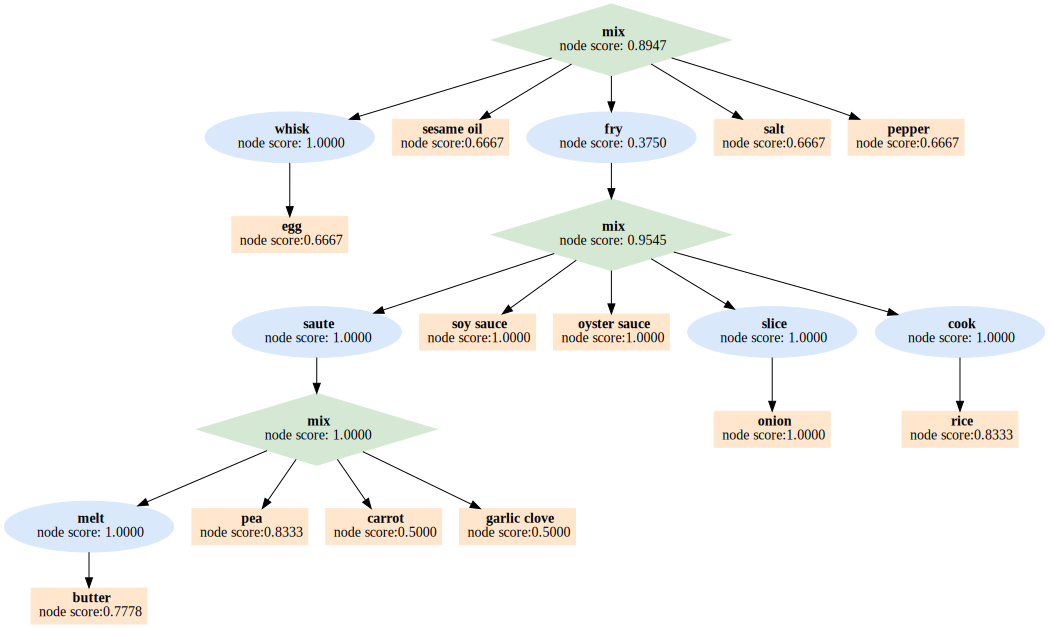

**Ingredients**:
  * onion
  * salt
  * garlic clove
  * oyster sauce
  * egg
  * soy sauce
  * carrot
  * rice
  * sesame oil
  * butter
  * pea
  * pepper


**Instructions**:

| Step | Instruction |
| ----:|:----------- |
| 1 | melt butter and mix it with pea, carrot and garlic clove. Then saute it. |
| 2 | slice onion, cook rice and mix it with soy sauce and oyster sauce and mix it together with the results of step 1. Then fry it. |
| 3 | whisk egg and mix it with sesame oil, salt and pepper and mix it together with the results of step 2. |


In [54]:
# ingredients:

d = ingredient_nodes([
    "butter",
    "egg",
    "pea",
    "carrot",
    "garlic clove",
    "salt",
    "pepper",
    "rice",
    "onion",
    "soy sauce",
    "oyster sauce",
    "sesame oil"
])

# actions

act(d, "melt", "butter")
act(d, "whisk", "egg")
act(d, "cook", "rice")
act(d, "slice", "onion")
mix(d, "salt", "egg")
mix(d, "pepper", "egg")
mix(d, "butter", "garlic clove")
mix (d, "pea", "butter")
mix (d, "carrot", "butter")
act(d, "saute", "butter")
mix (d, "butter", "rice")
mix (d, "butter", "onion")
mix (d, "soy sauce", "butter")
mix (d, "oyster sauce", "butter")
act(d, "fry", "rice")

r = get_root(d)

display(r.dot())
display(r.to_instruction().to_markdown())

## Easy Lazy Day Lasagna
https://www.momontimeout.com/lazy-day-lasagna/?utm_campaign=yummly

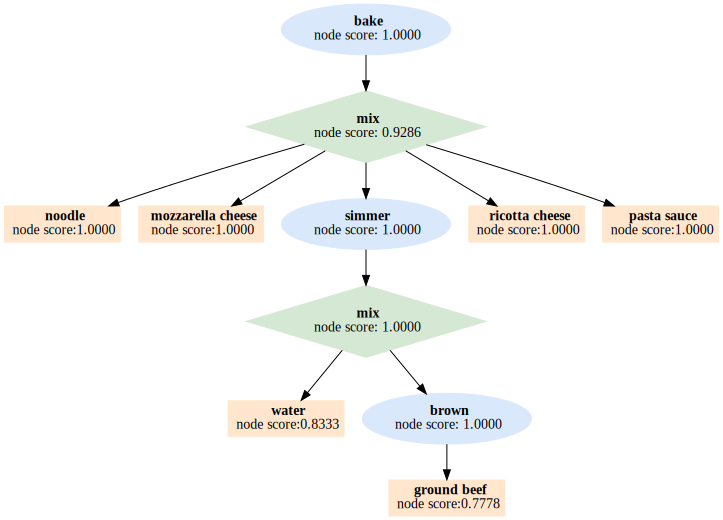

**Ingredients**:
  * pasta sauce
  * noodle
  * ricotta cheese
  * mozzarella cheese
  * water
  * ground beef


**Instructions**:

| Step | Instruction |
| ----:|:----------- |
| 1 | brown ground beef and mix it with water. Then simmer it. |
| 2 | Mix noodle, mozzarella cheese, ricotta cheese and pasta sauce and mix it together with the results of step 1. Then bake it. |


In [55]:

d = ingredient_nodes([
    "noodle",
    "ground beef",
    "pasta sauce",
    "water",
    "ricotta cheese",
    "mozzarella cheese"
])

# actions

mix (d, "noodle", "pasta sauce")
act(d, "brown", "ground beef")
mix (d, "water", "ground beef")
act(d, "simmer", "ground beef")
mix (d, "noodle", "ricotta cheese")
mix (d, "noodle", "mozzarella cheese")
mix (d, "noodle", "ground beef")
act(d, "bake", "noodle")

r = get_root(d)

display(r.dot())
display(r.to_instruction().to_markdown())

## Firecracker Chicken
https://www.melskitchencafe.com/firecracker-chicken/?utm_campaign=yummly

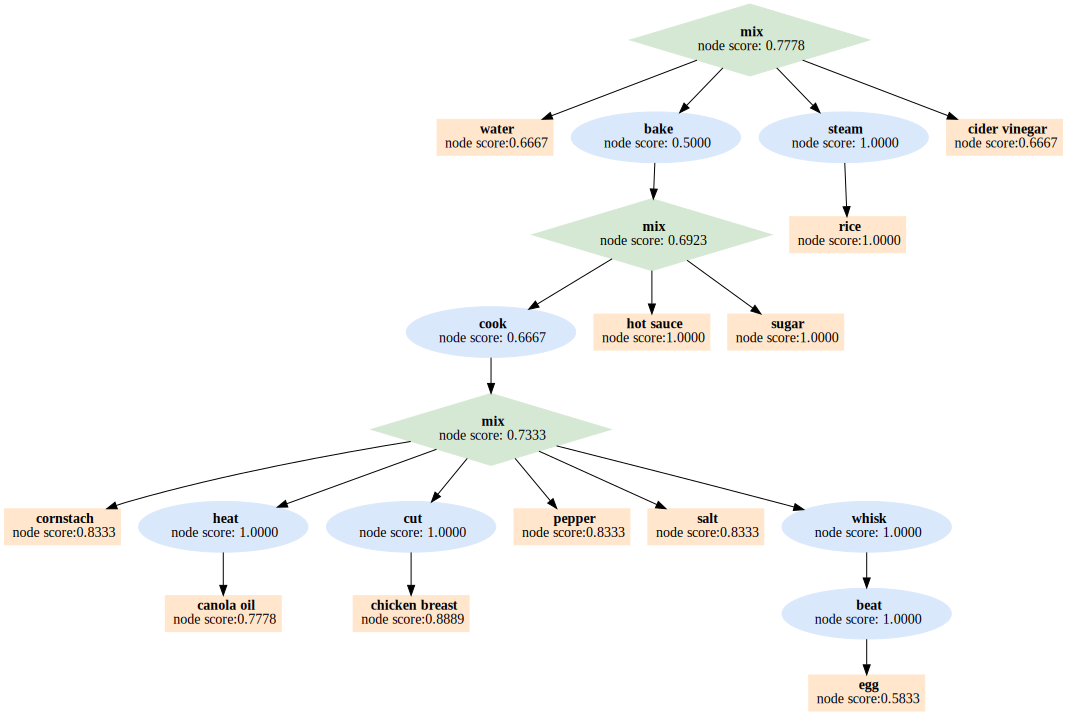

**Ingredients**:
  * hot sauce
  * cornstach
  * salt
  * sugar
  * canola oil
  * cider vinegar
  * egg
  * rice
  * water
  * pepper
  * chicken breast


**Instructions**:

| Step | Instruction |
| ----:|:----------- |
| 1 | beat and whisk egg |
| 2 | heat canola oil, cut chicken breast and mix it with cornstach, pepper and salt and mix it together with the results of step 1. Then cook it. |
| 3 | Mix hot sauce and sugar and mix it together with the results of step 2. Then bake it. |
| 4 | steam rice and mix it with water and cider vinegar and mix it together with the results of step 3. |


In [127]:

d = ingredient_nodes([
    "hot sauce",
    "sugar",
    "water",
    "cider vinegar",
    "salt",
    "canola oil",
    "chicken breast",
    "salt",
    "pepper",
    "cornstach",
    "egg",
    "rice"
    
])

# actions

act(d, "beat", "egg")
act(d, "whisk", "egg")
act(d, "cut", "chicken breast")
mix(d, "chicken breast", "salt")
mix(d, "chicken breast", "pepper")
mix(d, "cornstach", "chicken breast")

mix(d, "chicken breast", "egg")

act(d, "heat", "canola oil")

mix(d, "chicken breast", "canola oil")

act(d, "cook", "chicken breast")

mix(d, "sugar", "hot sauce")
mix(d, "hot sauce", "chicken breast")
act(d, "bake", "chicken breast")

act(d, "steam", "rice")
mix(d, "chicken breast", "rice")

r = get_root(d)

display(r.dot())
display(r.to_instruction().to_markdown())

## Italian Drunken Noodles
https://www.yummly.com/recipe/Italian-Drunken-Noodles-1835835#directions

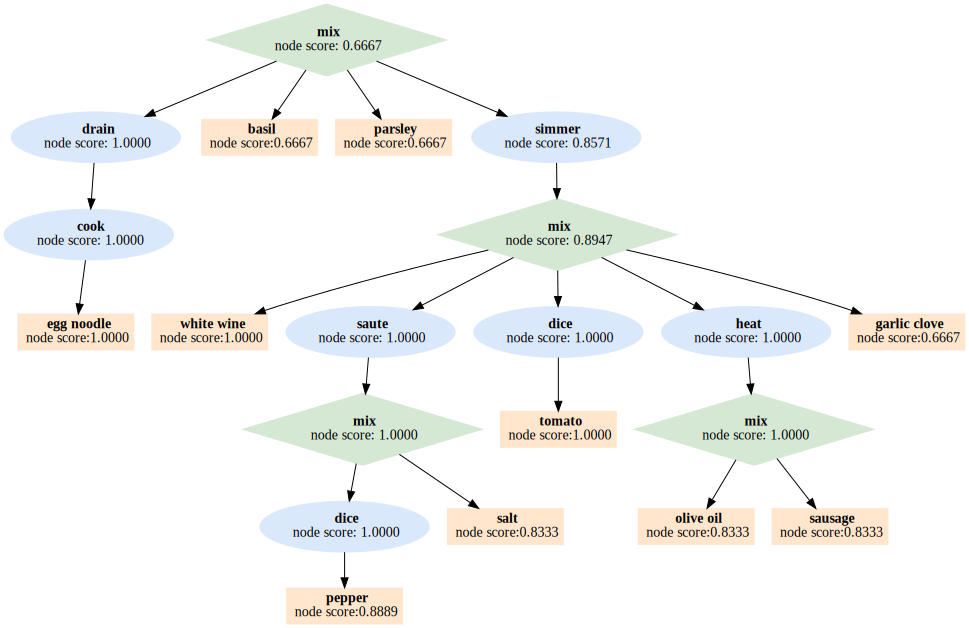

**Ingredients**:
  * salt
  * olive oil
  * garlic clove
  * tomato
  * white wine
  * egg noodle
  * parsley
  * sausage
  * basil
  * pepper


**Instructions**:

| Step | Instruction |
| ----:|:----------- |
| 1 | cook and drain egg noodle |
| 2 | dice pepper and mix it with salt. Then saute it. |
| 3 | Mix olive oil and sausage. Then heat it. |
| 4 | dice tomato and mix it with white wine and garlic clove and mix it together with the results of step 2 and step 3. Then simmer it. |
| 5 | Mix basil and parsley and mix it together with the results of step 1 and step 4. |


In [61]:

d = ingredient_nodes([
    "sausage",
    "salt",
    "pepper",
    "garlic clove",
    "white wine",
    "tomato",
    "parsley",
    "basil",
    "egg noodle",
    "olive oil"
])

# actions

mix (d, "olive oil", "sausage")
act (d, "heat", "sausage")
act (d, "dice", "pepper")
mix (d, "pepper", "salt")
act (d, "saute", "pepper")
mix (d, "pepper", "garlic clove")
mix (d, "white wine", "pepper")
act (d, "dice", "tomato")
mix (d, "tomato", "pepper")
mix (d, "sausage", "pepper")
act (d, "simmer", "sausage")
mix (d, "parsley", "pepper")
mix (d, "basil", "pepper")

act(d, "cook", "egg noodle")
act(d, "drain", "egg noodle")

mix(d, "egg noodle", "sausage")

r = get_root(d)

display(r.dot())
display(r.to_instruction().to_markdown())

## Italian Pasta Salad
https://www.yummly.com/recipe/Italian-Pasta-Salad-9104504#directions

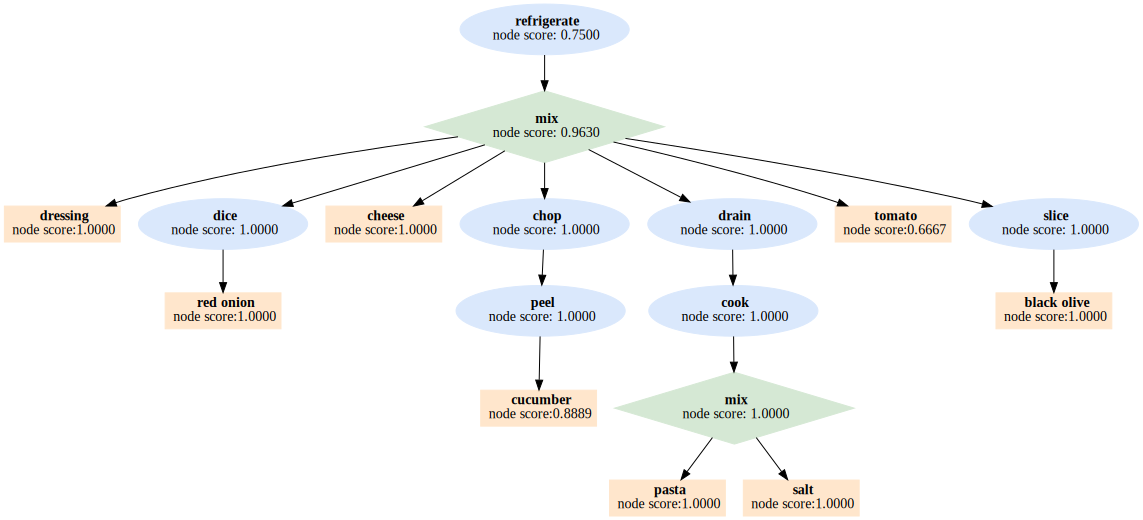

**Ingredients**:
  * dressing
  * cheese
  * salt
  * tomato
  * pasta
  * black olive
  * red onion
  * cucumber


**Instructions**:

| Step | Instruction |
| ----:|:----------- |
| 1 | peel and chop cucumber |
| 2 | Mix pasta and salt. Then cook it. |
| 3 | drain the result of step 2 |
| 4 | dice red onion, slice black olive and mix it with dressing, cheese and tomato and mix it together with the results of step 1 and step 3. Then refrigerate it. |


In [66]:

d = ingredient_nodes([
    "pasta",
    "cucumber",
    "tomato",
    "cheese",
    "black olive",
    "red onion",
    "dressing",
    "salt"
])

# actions

mix (d, "salt", "pasta")
act (d, "peel", "cucumber")
act (d, "chop", "cucumber")
act (d, "slice", "black olive")
act (d, "dice", "red onion")
act (d, "cook", "pasta")
act (d, "drain", "pasta")
mix (d, "pasta", "cucumber")
mix (d, "pasta", "tomato")
mix (d, "pasta", "cheese")
mix (d, "pasta", "black olive")
mix (d, "pasta", "red onion")
mix (d, "pasta", "dressing")

act(d, "refrigerate", "pasta")

r = get_root(d)

display(r.dot())
display(r.to_instruction().to_markdown())

## Mexican Rice
https://www.homesicktexan.com/2008/06/with-beans-comes-rice.html

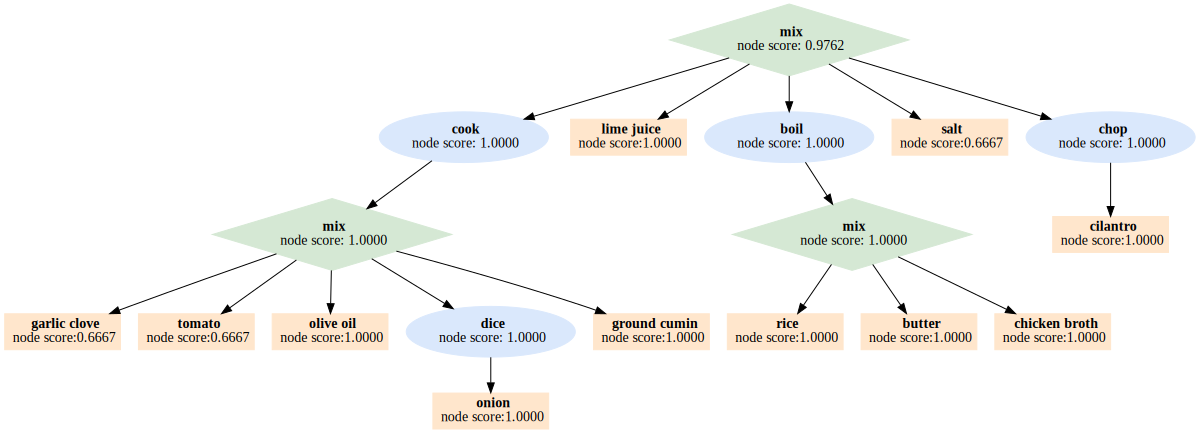

**Ingredients**:
  * onion
  * olive oil
  * garlic clove
  * lime juice
  * chicken broth
  * salt
  * cilantro
  * tomato
  * ground cumin
  * rice
  * butter


**Instructions**:

| Step | Instruction |
| ----:|:----------- |
| 1 | dice onion and mix it with garlic clove, tomato, olive oil and ground cumin. Then cook it. |
| 2 | Mix rice, butter and chicken broth. Then boil it. |
| 3 | chop cilantro and mix it with lime juice and salt and mix it together with the results of step 1 and step 2. |


In [77]:

d = ingredient_nodes([
    "rice",
    "chicken broth",
    "butter",
    "olive oil",
    "onion",
    "garlic clove",
    "tomato",
    "lime juice",
    "cilantro",
    "ground cumin",
    "salt"
])

# actions

act(d, "dice", "onion")
act(d, "chop", "cilantro")

mix (d, "rice", "chicken broth")
mix (d, "rice", "butter")
act (d, "boil", "rice")

mix (d, "olive oil", "onion")
mix (d, "garlic clove", "onion")
mix (d, "tomato", "onion")
mix (d, "ground cumin", "onion")
act (d, "cook", "onion")

mix (d, "rice", "onion")
mix (d, "lime juice", "onion")
mix (d, "cilantro", "onion")


r = get_root(d)

display(r.dot())
display(r.to_instruction().to_markdown())

## One Pot Cheesy Taco Pasta
http://www.motherthyme.com/2016/07/one-pot-cheesy-taco-pasta.html?utm_campaign=yummly

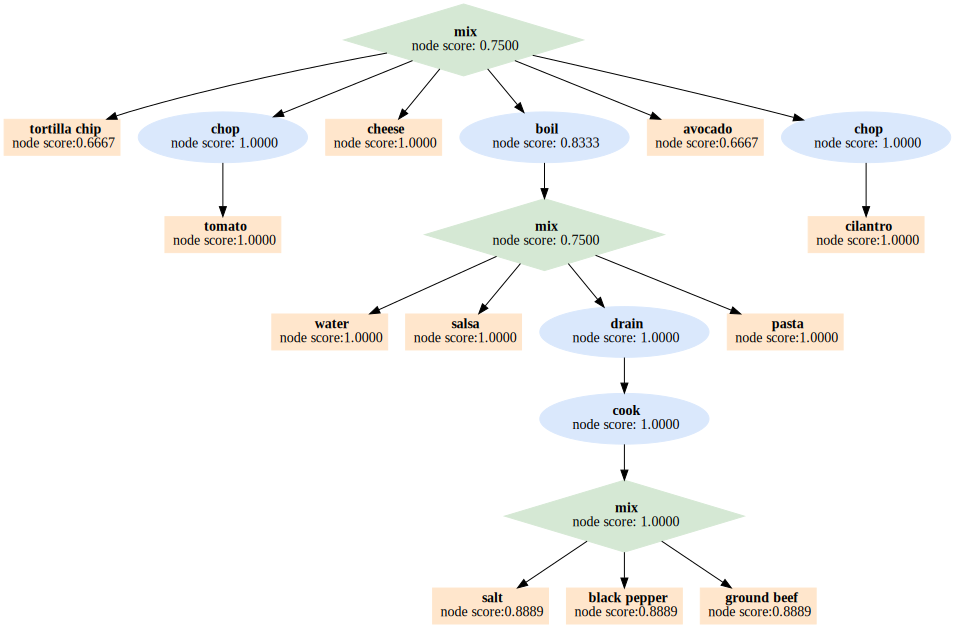

**Ingredients**:
  * cilantro
  * cheese
  * salt
  * black pepper
  * tomato
  * pasta
  * tortilla chip
  * salsa
  * avocado
  * water
  * ground beef


**Instructions**:

| Step | Instruction |
| ----:|:----------- |
| 1 | Mix salt, black pepper and ground beef. Then cook it. |
| 2 | drain the result of step 1 |
| 3 | Mix water, salsa and pasta and mix it together with the results of step 2. Then boil it. |
| 4 | chop tomato, chop cilantro and mix it with tortilla chip, cheese and avocado and mix it together with the results of step 3. |


In [84]:

d = ingredient_nodes([
    "ground beef",
    "salt",
    "black pepper",
    "water",
    "salsa",
    "pasta",
    "cheese",
    "tomato",
    "avocado",
    "cilantro",
    "tortilla chip"
])

# actions

act (d, "chop", "tomato")
act (d, "chop", "cilantro")

mix (d, "ground beef", "salt")
mix (d, "ground beef", "black pepper")
act (d, "cook", "ground beef")
act (d, "drain", "ground beef")

mix (d, "ground beef", "salsa")
mix (d, "ground beef", "water")
mix (d, "ground beef", "pasta")

act(d, "boil", "pasta")

mix (d, "cheese", "pasta")


r = get_root(d)

display(r.dot())
display(r.to_instruction().to_markdown())

## Spanish Rice and Beans
https://www.yummly.com/recipe/Spanish-Rice-and-Beans-814#directions

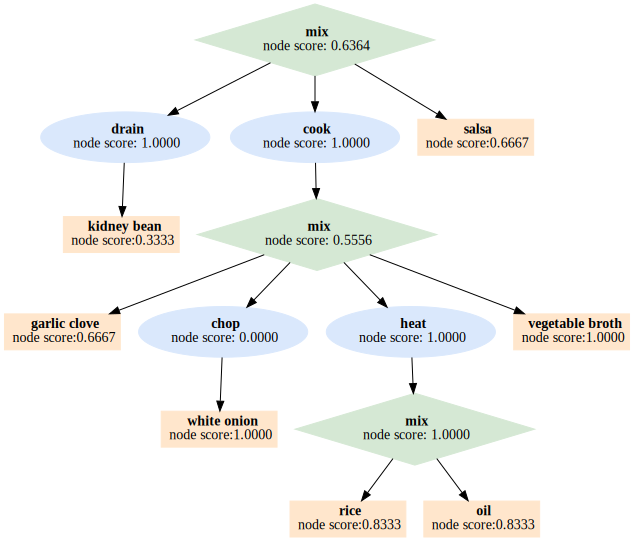

**Ingredients**:
  * garlic clove
  * oil
  * kidney bean
  * white onion
  * salsa
  * vegetable broth
  * rice


**Instructions**:

| Step | Instruction |
| ----:|:----------- |
| 1 | Mix rice and oil. Then heat it. |
| 2 | chop white onion and mix it with garlic clove and vegetable broth and mix it together with the results of step 1. Then cook it. |
| 3 | drain kidney bean and mix it with salsa and mix it together with the results of step 2. |


In [90]:

d = ingredient_nodes([
    "oil",
    "rice",
    "white onion",
    "garlic clove",
    "vegetable broth",
    "salsa",
    "kidney bean"
])

# actions
act (d, "drain", "kidney bean")
act (d, "chop", "white onion")

mix (d, "rice", "oil")
act(d, "heat", "rice")

mix(d, "rice", "white onion")
mix (d, "rice", "garlic clove")
mix (d, "rice", "garlic clove")

mix (d, "vegetable broth", "rice")

act (d, "cook", "rice")

r = get_root(d)

display(r.dot())
display(r.to_instruction().to_markdown())

## Vegan Curried Rice
https://www.yummly.com/recipe/Vegan-Curried-Rice-2319743#directions

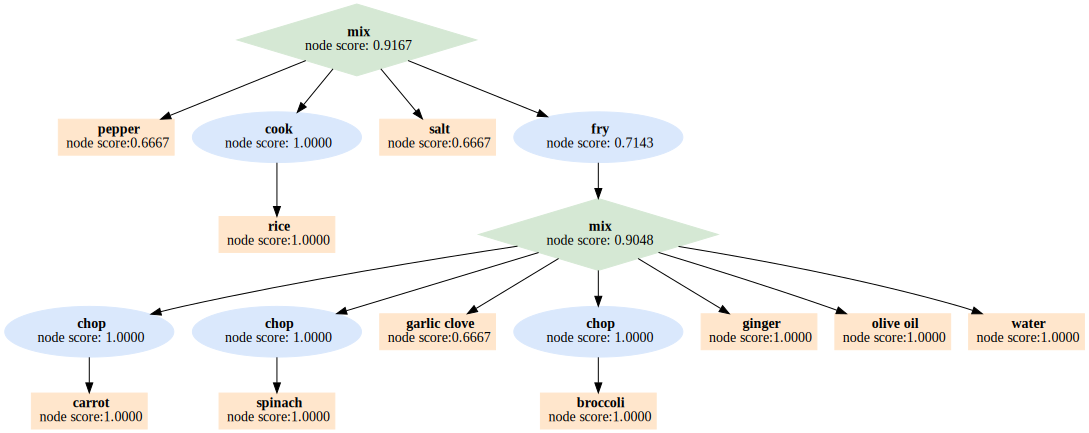

**Ingredients**:
  * salt
  * garlic clove
  * ginger
  * olive oil
  * broccoli
  * carrot
  * rice
  * spinach
  * water
  * pepper


**Instructions**:

| Step | Instruction |
| ----:|:----------- |
| 1 | chop carrot, chop spinach, chop broccoli and mix it with garlic clove, ginger, olive oil and water. Then fry it. |
| 2 | cook rice and mix it with pepper and salt and mix it together with the results of step 1. |


In [104]:

d = ingredient_nodes([
    "olive oil",
    "ginger",
    "garlic clove",
    "carrot",
    "broccoli",
    "salt",
    "pepper",
    "water",
    "rice",
    "spinach"
])

# actions
act(d, "chop", "carrot")
act(d, "chop", "broccoli")
act(d, "cook","rice")
act(d, "chop", "spinach")

mix(d, "olive oil", "ginger")
mix(d, "olive oil", "garlic clove")
mix(d, "olive oil", "carrot")
mix(d, "olive oil", "broccoli")
mix(d, "olive oil", "water")
mix(d, "olive oil", "spinach")

act(d, "fry", "olive oil")

r = get_root(d)

display(r.dot())
display(r.to_instruction().to_markdown())

## Vegetable Ramen Pad Thai
https://www.yummly.com/recipe/Vegetable-Ramen-Pad-Thai-2067502#directions

In [119]:

d = ingredient_nodes([
    "ramen noodle",
    "vegetable oil",
    "vegetable",
    "teriyaki sauce",
    "water",
    "peanut butter",
    "sriacha sauce"
])

# actions
act(d, "heat", "water")
mix(d, "ramen noodle", "water")
act(d, "cook", "ramen noodle")
act(d, "drain", "ramen noodle")

mix (d, "vegetable oil", "vegetable")
act(d, "cook", "vegetable")

mix (d, "vegetable", "ramen noodle")


r = get_root(d)

#display(r.dot())  # ← cannot plot tree because some ingredients are unknown!
display(r.to_instruction().to_markdown())

**Ingredients**:
  * vegetable
  * peanut butter
  * vegetable oil
  * sriacha sauce
  * water
  * ramen noodle
  * teriyaki sauce


**Instructions**:

| Step | Instruction |
| ----:|:----------- |
| 1 | Mix vegetable oil and vegetable. Then cook it. |
| 2 | heat water and mix it with ramen noodle. Then cook it. |
| 3 | drain the result of step 2 |
| 4 | Mix sriacha sauce, peanut butter and teriyaki sauce and mix it together with the results of step 1 and step 3. |
